In [31]:
# !pip install statsmodels

# Concrete Strength Prediction with Linear Regression

In this notebook, we'll implement linear regression algorithm to predict the strength of concrete. This data was taken frpm Kaggle from the url below.

https://www.kaggle.com/datasets/mchilamwar/predict-concrete-strength

### Importing the necessary libraries.

In [1]:
# Standard libraries for data cleaning , exploratory data analysis and visualization.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import joblib

In [3]:
# Scikit learn for machine learning algorithms and Metrics.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

### Read and explore the data.

In [4]:

data =pd.read_csv('ConcreteStrengthData.csv')

In [5]:
data.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
# Explore the mean, standard deviation , maximum and minimum values of the data.This will only display the numerical values.

data.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
#  Rename the columns for readability.

data.rename(columns = {'CementComponent ':'cement_component', 
                       'BlastFurnaceSlag':'blast_furnace_slag',
                       'FlyAshComponent':'fly_ash_component',
                       'WaterComponent':'water_component',
                       'SuperplasticizerComponent':'superplasticizer_component',
                       'CoarseAggregateComponent':'coarse_aggregate_component',
                       'FineAggregateComponent':'fine_aggregate_component',
                       'AgeInDays':'age_in_days',
                       'Strength':'strength'
                      }, inplace = True)

In [8]:
#  Check the shape of the data. The first value is the number of rows and the second value is the number of columns.

data.shape

(1030, 9)

In [9]:
# Check the first 5 rows of the data.

data.head()

,cement_component,blast_furnace_slag,fly_ash_component,water_component,superplasticizer_component,coarse_aggregate_component,fine_aggregate_component,age_in_days,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
# Check the general information of the data and check the datatypes.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cement_component            1030 non-null   float64
 1   blast_furnace_slag          1030 non-null   float64
 2   fly_ash_component           1030 non-null   float64
 3   water_component             1030 non-null   float64
 4   superplasticizer_component  1030 non-null   float64
 5   coarse_aggregate_component  1030 non-null   float64
 6   fine_aggregate_component    1030 non-null   float64
 7   age_in_days                 1030 non-null   int64  
 8   strength                    1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [11]:
# Check if there are null values and sum the number of null values.

data.isnull().sum()

cement_component              0
blast_furnace_slag            0
fly_ash_component             0
water_component               0
superplasticizer_component    0
coarse_aggregate_component    0
fine_aggregate_component      0
age_in_days                   0
strength                      0
dtype: int64

array([[<AxesSubplot:title={'center':'cement_component'}>,
        <AxesSubplot:title={'center':'blast_furnace_slag'}>,
        <AxesSubplot:title={'center':'fly_ash_component'}>],
       [<AxesSubplot:title={'center':'water_component'}>,
        <AxesSubplot:title={'center':'superplasticizer_component'}>,
        <AxesSubplot:title={'center':'coarse_aggregate_component'}>],
       [<AxesSubplot:title={'center':'fine_aggregate_component'}>,
        <AxesSubplot:title={'center':'age_in_days'}>,
        <AxesSubplot:title={'center':'strength'}>]], dtype=object)

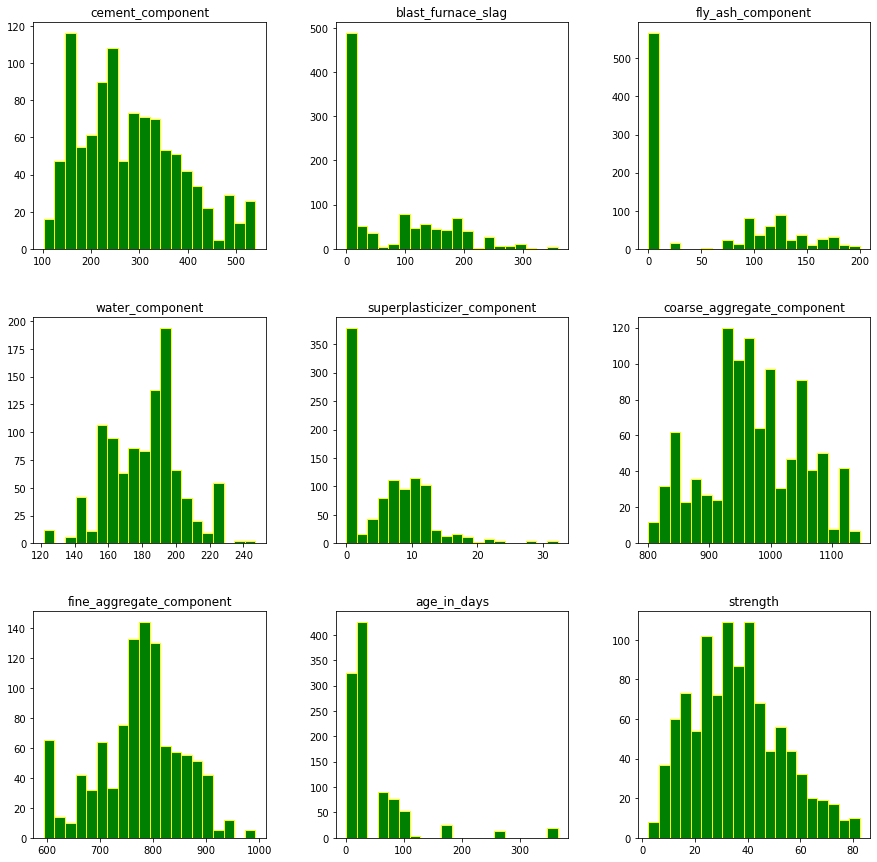

In [12]:
# Visualize the general trend of each column with matplotlib.

data.hist(bins=20, edgecolor="yellow", figsize=(15,15), color="green", grid=False)

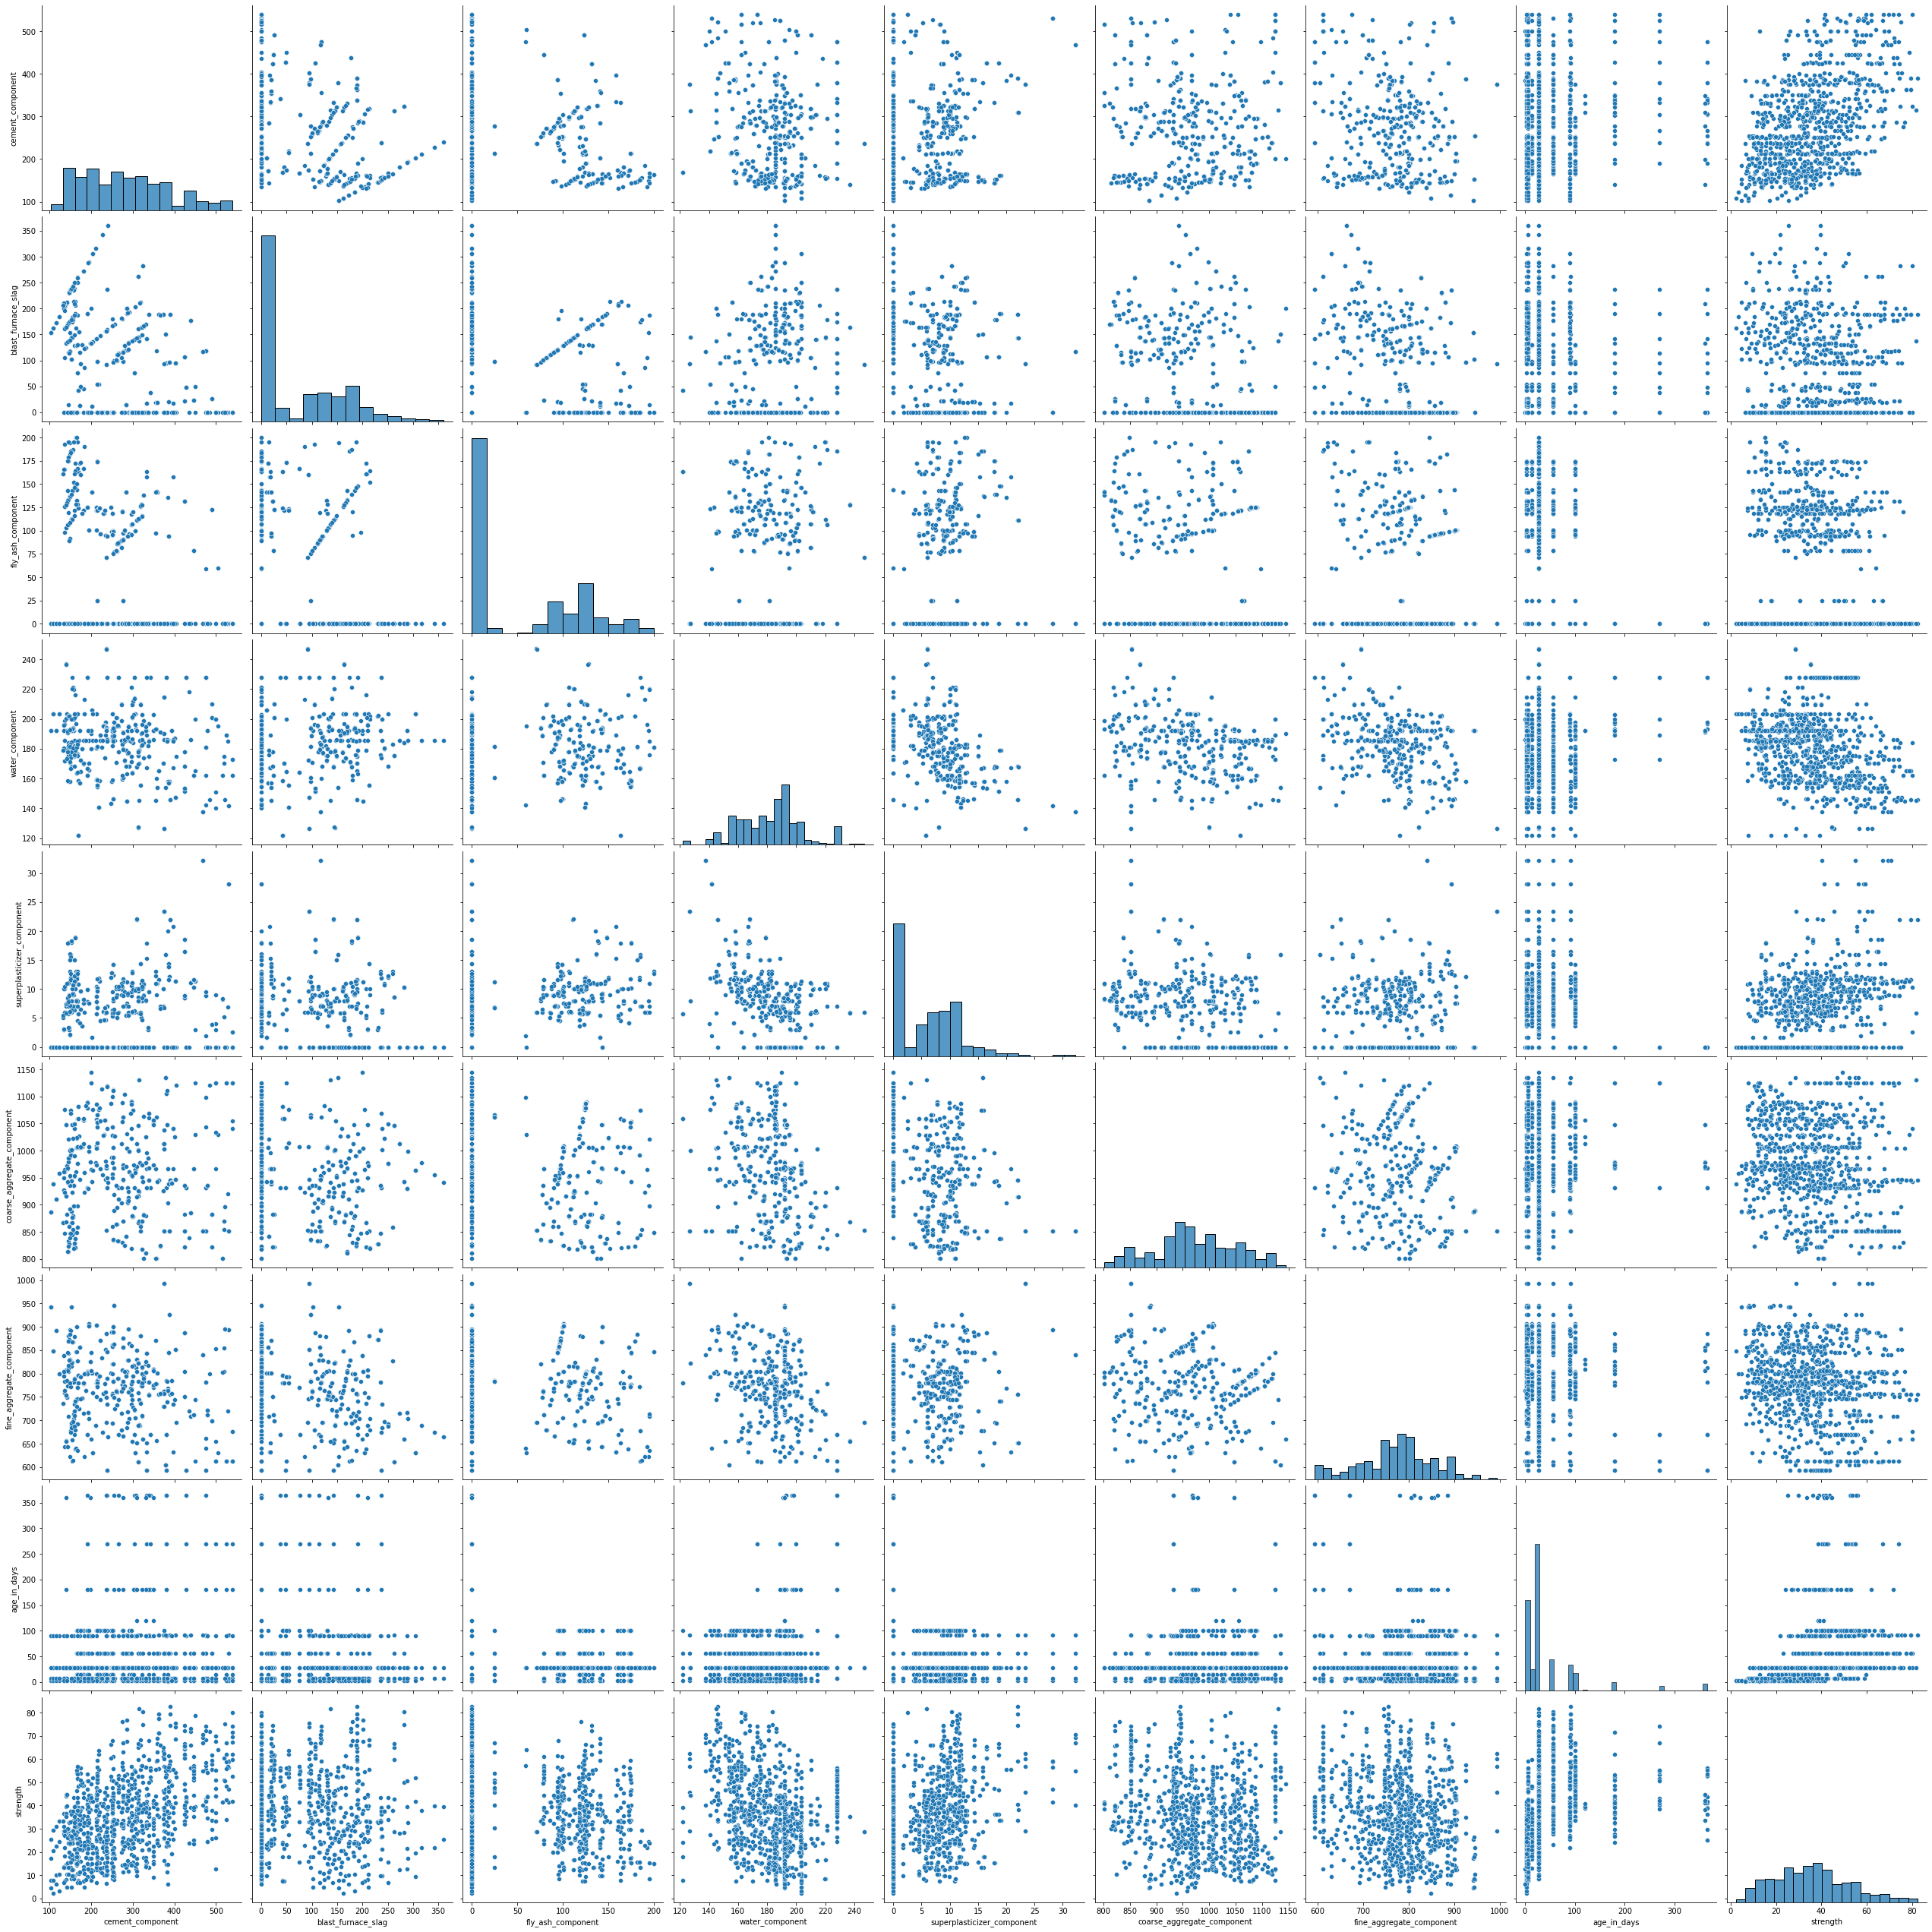

In [13]:
# Visualize the relationship between each feature against another feature.

sns.pairplot(data, height=4)
plt.show()

In [14]:
data.tail()

,cement_component,blast_furnace_slag,fly_ash_component,water_component,superplasticizer_component,coarse_aggregate_component,fine_aggregate_component,age_in_days,strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


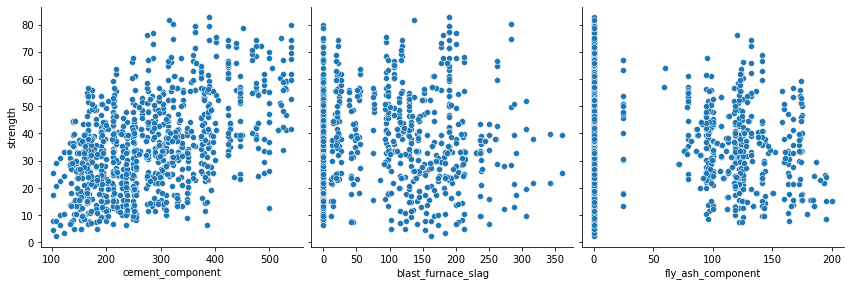

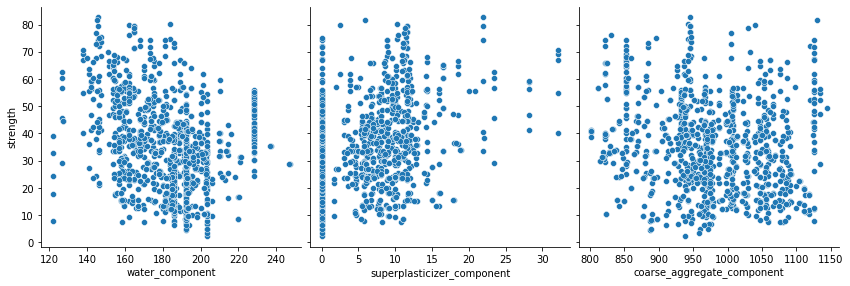

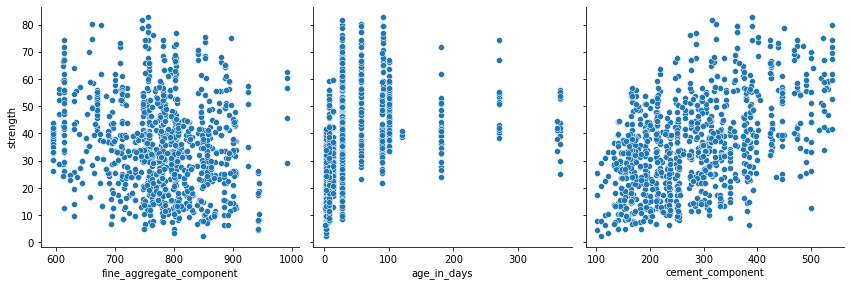

In [15]:
# Viualising each feature in relation to strength only for better view.


def printpair(x,y,z):
    sns.pairplot(data, x_vars=[x,y,z], y_vars=['strength'],height=4, aspect=1, kind='scatter')
    plt.show()

printpair('cement_component', 'blast_furnace_slag', 'fly_ash_component')
printpair('water_component', 'superplasticizer_component', 'coarse_aggregate_component')
printpair('fine_aggregate_component', 'age_in_days','cement_component')

### Prepare data for machine learning model.

In [16]:
# Split data into train and test sets

data_train, data_test = train_test_split(data,test_size = 0.2, random_state= 42)

<AxesSubplot:>

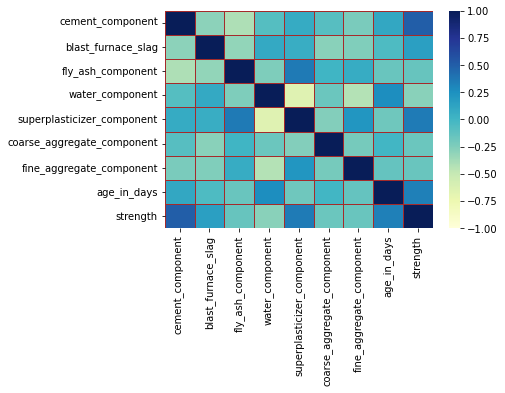

In [17]:
# Visualize the train set data to find the correlation of the features.

sns.heatmap(data_train.corr(), cmap='YlGnBu', center=0, vmin=-1, vmax=1, linewidth=1, linecolor='brown')

In [18]:
# Scale the train set data to reduce the disparity in the values.

scaler = StandardScaler()

In [19]:
# Separating the features from the target in the train set.

X_train = data_train.drop('strength',axis=1)
y_train = data_train['strength']

In [20]:
# Separating the features from the target in the test set.

x_test = data_test.drop('strength', axis=1)
y_test = data_test['strength']

In [21]:
# We use fit_transform on train data.

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-1.16087734,  0.85738747,  0.9824489 , ..., -0.25746155,
        -0.64752011, -0.27567315],
       [ 1.30862304, -0.60249189,  1.23259821, ..., -1.92694961,
        -0.2731482 , -0.27567315],
       [-0.0768653 , -0.85558366,  1.06687429, ...,  1.01785948,
         0.06662828, -0.68931339],
       ...,
       [-0.86591441, -0.85558366,  1.12628475, ...,  1.34082214,
         0.33103616,  0.91561074],
       [ 1.78316909,  0.51111191, -0.83113361, ..., -1.54422615,
         0.11605031, -0.27567315],
       [ 0.28509237, -0.85558366,  0.9355459 , ..., -0.6172979 ,
         0.13458358, -0.27567315]])

In [22]:
# We use transform only on test data.

x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[-0.1615392 ,  0.45589189, -0.83113361, ..., -0.52829244,
        -1.26158888,  5.30019728],
       [ 0.73730683,  1.31870475, -0.83113361, ..., -0.36681111,
        -0.20148625, -0.62313095],
       [ 0.99132853,  1.31870475, -0.83113361, ..., -0.36681111,
        -0.20148625, -0.27567315],
       ...,
       [ 0.02734873,  1.45560439, -0.83113361, ...,  0.39482129,
         0.3903426 , -0.62313095],
       [ 1.30862304, -0.60249189,  1.23259821, ..., -1.92694961,
        -0.2731482 ,  0.18760392],
       [ 0.51771297, -0.85558366, -0.83113361, ..., -0.07055009,
         0.10987256,  0.75015465]])

In [23]:
# Create an object of the linear regression model and fit the model on the scaled train set features and target.

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

### Predict concrete strength on the test set.

In [24]:
# Predict the concrete strength of the test set.

y_pred = lr.predict(x_test_scaled)
y_pred

array([59.65804162, 52.0412113 , 63.53513339, 51.57545676, 17.22001733,
       39.86561321, 26.6982471 , 44.73648869, 29.36619785, 38.18612542,
       27.76438338, 19.81055461, 66.8940356 , 52.28562112, 29.96928612,
       44.45926401, 29.2284856 , 26.53340084, 31.98162681, 32.03208356,
       36.82327256, 31.77175527, 38.07286862, 25.12353728, 33.0993284 ,
       33.85670933, 14.24140345, 40.33250901, 41.88282591, 21.33261142,
       35.71648095, 30.96693001, 43.87446203, 45.52648807, 30.7629146 ,
       29.59299935, 28.90650584, 38.85005738, 20.34631763, 38.45267413,
       21.16537625, 15.88280149, 31.06077771, 50.70684031, 20.26957631,
       57.64501168, 50.90245564, 60.96378987, 20.00393916, 19.22241454,
       40.4816289 , 36.23627397, 30.01525382, 33.42739866, 46.66492833,
       51.47376399, 27.73605695, 15.69651113, 29.69654891, 18.12447629,
       38.63227644, 20.52725493, 31.56412397, 55.48969297, 22.93752175,
       21.34689286, 32.26933604, 16.70816961, 25.40482587, 25.56

In [26]:
# Building a dataframe with the Actual target values and the predicted values of the test set.

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
31,52.91,59.658042
109,55.90,52.041211
136,74.50,63.535133
88,35.30,51.575457
918,10.54,17.220017
...,...,...
482,56.14,55.987586
545,18.75,17.479621
110,38.00,49.086522
514,74.36,54.181552


### Evalute the model.

In [27]:
# Evalute the model.

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.745559243921436
Mean Squared Error: 95.97094009110683
Root Mean Squared Error: 9.79647590162436


In [32]:
residual = y_test - y_pred

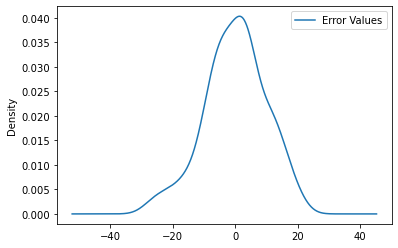

In [37]:
test_residuals = pd.DataFrame({'Error Values': (residual)}).plot.kde()


### Discussion

The mean of the concrete strength is 35.8 , and the standard deviation from this mean is 16.7 . The mean absolute error of our prediction is 7.75 which is less than the standeard deviation. This means that our model is good.

Visualizing the error values of the test set also shows the errors follow a standard distribution 

### Save the model.

In [28]:
joblib.dump(lr, 'concrete_strength_lr')

['concrete_strength_lr']

### Load the model back to use for new prediction.

In [29]:

concrete_model = joblib.load('concrete_strength_lr')

In [30]:
concrete_model

LinearRegression()